In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.manifold import SpectralEmbedding
from scipy.linalg import svd
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


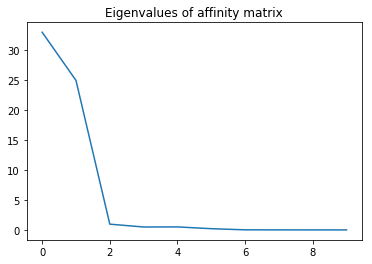

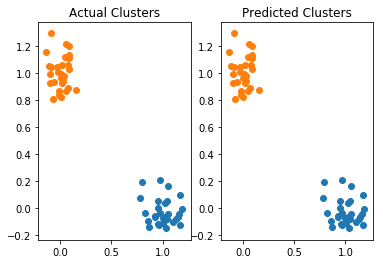

In [2]:
## Test example of spectral clustering

# Create two distributions with same covariance and different means
mean1 = np.array([1.,0.])
mean2 = np.array([0.,1.])
cov = np.array([[0.01,0.],[0.,.01]])
a = np.random.multivariate_normal(mean1, cov, 30)
b = np.random.multivariate_normal(mean2, cov, 30)

# Construct adjacency matrix
data = np.vstack((a,b))
nClusters = 2
m = SpectralClustering(n_clusters=nClusters,affinity='rbf')
m.fit(data)
y = m.fit_predict(data)

# Compute eigenvalues and eigenvectors of affinity matrix
eigenval, eigenvect = np.linalg.eig(m.affinity_matrix_)

# Plot eigenvalues
plt.plot(eigenval[:10])
plt.title('Eigenvalues of affinity matrix')
plt.show()

# Display actual clusters
plt.subplot(121)
plt.title('Actual Clusters')
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

plt.subplot(122)
# Plot predicted clusters
for i in range(nClusters):
    plt.scatter(data[y==i][:,0],data[y==i][:,1])
plt.title('Predicted Clusters')
plt.show()

In [3]:
# Load video
video = np.load('video1.npz')['video']
numFrames,height,width,RGB = video.shape
print(video.shape)

(319, 660, 1280, 3)


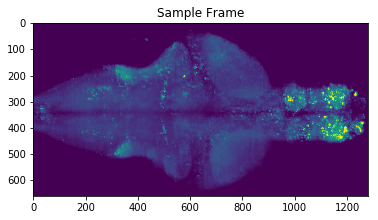

In [4]:
# Convert to grayscale to reduce computation time
video = np.mean(video,axis=3)

# Display sample frame
plt.imshow(video[20,:,:])
plt.title('Sample Frame')
plt.show()

# Reshape each frame into a column vector
video = np.reshape(video,(numFrames,height*width))

In [113]:
window = 8
overlap = int(0.75*window)

numWindows = int(1 + (numFrames - window)/overlap)
windows = np.array([video[i*overlap:i*overlap+window,:].flatten() for i in range(numWindows)])

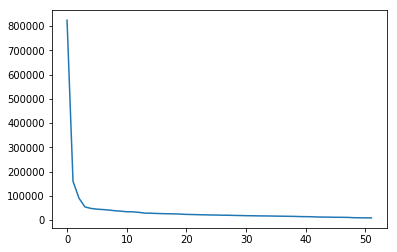

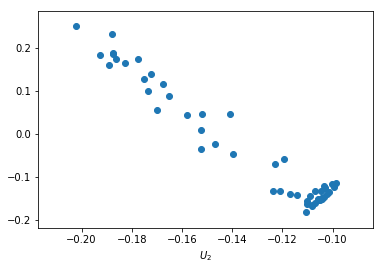

In [114]:
## A brief analysis using SVD
# Not really relevant


# Center each sample (frame) and scale to unit variance
#scale(windows,axis=0,with_mean=False, with_std=True, copy=False)
u,s,vt = svd(windows,full_matrices=False)

# Plot of singular value spectrum spectrum
plt.plot(s)
plt.show()

# First 2 columns of U in the SVD decomposition of video
# This corresponds to the projection of the data along the first 2 
# directions of maximum variance
plt.scatter(u[:,0],u[:,1])
plt.xlabel(r'$U_1$')
plt.xlabel(r'$U_2$')
plt.show()

In [115]:
# Perform spectral clustering with RBF kernel
# gamma tuned 1e-10 so that off diagonal elements are nonzero
m = SpectralClustering(affinity='rbf',gamma = 1e-10)
m.fit(windows)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1e-10,
          kernel_params=None, n_clusters=8, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

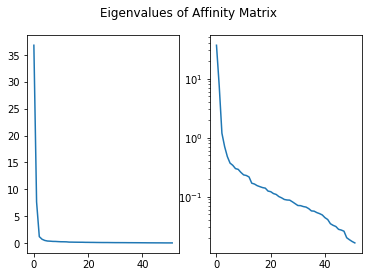

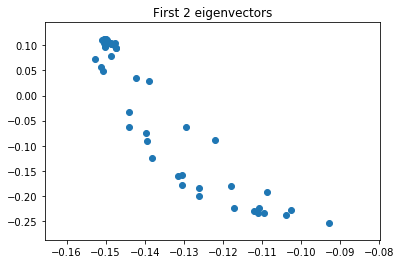

Eigenval 0 : 36.8134584741
Eigenval 1 : 7.63985208803
Eigenval 2 : 1.18849782134
Eigenval 3 : 0.705378936158
Eigenval 4 : 0.477896352729
Eigenval 5 : 0.369913072963
Eigenval 6 : 0.339791168383
Eigenval 7 : 0.298660467768
Eigenval 8 : 0.289871738036
Eigenval 9 : 0.257416498443


In [116]:
# Plot eigenvalues and eigenvectors of affinity matrix
# For some reason thi
eigenval, eigenvect = np.linalg.eig(m.affinity_matrix_)

# Sort eigenvalues in decreasing order
indices = np.argsort(eigenval)[::-1]
eigenval = eigenval[indices]
eigenvect = eigenvect[:,indices]

plt.subplot(121)
plt.plot(eigenval)
# Exclude the first eigenvalue
#plt.xlabel('Exclude 1st eigenvalue')
plt.subplot(122)
plt.semilogy(eigenval)


plt.suptitle('Eigenvalues of Affinity Matrix')
plt.show()



# Plot first two eigenvectors
plt.scatter(eigenvect[:,0],eigenvect[:,1])
plt.title('First 2 eigenvectors')
plt.show()

# Print first 10 eigenvalues
for i in range(10):
    print('Eigenval ' + str(i) + ' : ' + str(eigenval[i]))

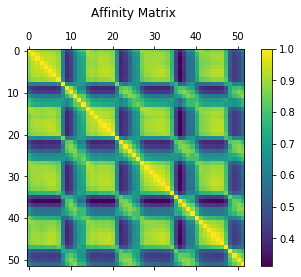

In [117]:
# Plot of affinity matrix
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.imshow(m.affinity_matrix_- np.eye(len(m.affinity_matrix_)))
cax = ax.matshow(m.affinity_matrix_)
fig.colorbar(cax)
plt.title('Affinity Matrix \n')
plt.show()

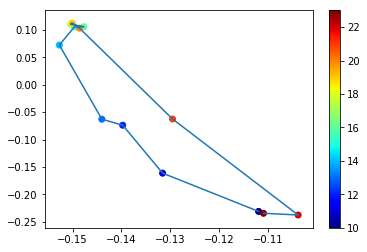

In [118]:
subset = np.arange(10,24)
tag = subset
plt.plot(eigenvect[:,0][subset],eigenvect[:,1][subset])
scat = plt.scatter(eigenvect[:,0][subset],eigenvect[:,1][subset],
                   marker='o',c = tag, cmap = plt.cm.jet)
plt.colorbar()
plt.show()

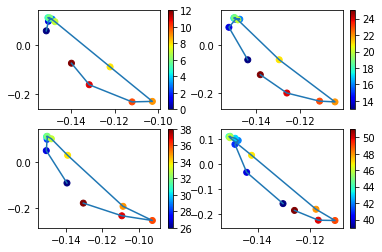

In [119]:
# Plot of first 2 eigenvectors as a function of indices (kind of corresponds to time)

# Same periodic structure seen at different intervals
# Bottom right corresponds to dark spots on affinity matrix (periods of high activity)
# Similarly, top left corresponds to periods of low activity
## These 2 locations may swap for different window sizes - Check if I have time
plt.close()
for i in range(4):
    plt.subplot(2,2,i+1)
    subset = np.arange(i*numWindows/4,(i+1)*numWindows/4)
    tag = subset
    plt.plot(eigenvect[:,0][subset],eigenvect[:,1][subset])
    scat = plt.scatter(eigenvect[:,0][subset],eigenvect[:,1][subset],
                       marker='o',c = tag, cmap = plt.cm.jet)
    plt.colorbar()
plt.show()

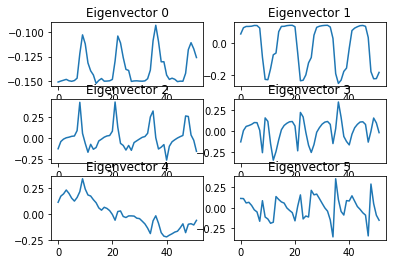

In [120]:
# Plot first 6 eigenvalues of affinity matrix
# Note that the 1st eigenvector corresponds to periods of high activity
# while the 2nd eigenvector corresponds to periods of low activity

n = 6
for i in range(n):
    plt.subplot(3,2,i+1)
    plt.title('Eigenvector ' + str(i))
    plt.plot(eigenvect[:,i])
plt.show()

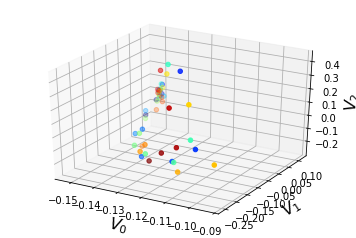

In [122]:
# Plot of first 3 eigenvectors

plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tag = np.arange(0,numWindows)

ax.scatter(eigenvect[:,0][tag],eigenvect[:,1][tag],eigenvect[:,2][tag],c = tag,cmap = plt.cm.jet)

ax.set_xlabel(r'$V_0$',fontsize=16)
ax.set_ylabel(r'$V_1$',fontsize=16)
ax.set_zlabel(r'$V_2$',fontsize=16)
plt.show()